<a href="https://colab.research.google.com/github/jaelani757/london-crime/blob/main/PYTN_Assgn_1_4_Jaelani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Jaelani

Kode Peserta : PYTH-KS14-002

# OVERVIEW


*   Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.




# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium

# PREAPERING DATASET

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘kaggle’: File exists
cp: cannot create regular file '/.kaggle/': Not a directory


In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d jboysen/london-crime

 91% 111M/121M [00:00<00:00, 155MB/s] 
100% 121M/121M [00:01<00:00, 126MB/s]


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/london-crime.zip')
zip_file.extractall('/tmp/')

In [ ]:
df = pd.read_csv ('/tmp/london_crime_by_lsoa.csv')

# DATA PROCESSING

In [ ]:
# Print the first 5 rows of the dataset
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

   lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6  
(13490604, 7)
lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


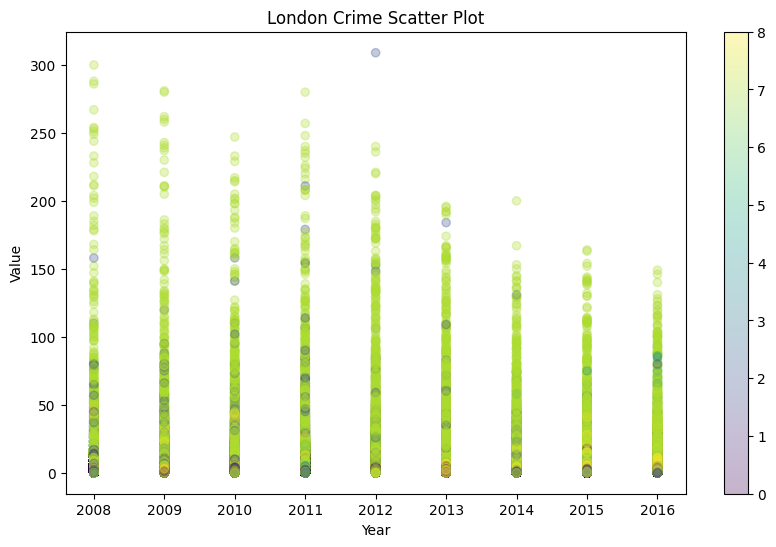

In [ ]:
#Convert 'major_category' column to categorical data type
df['major_category'] = df['major_category'].astype('category')

# Select columns to use in the scatter plot
x = df['year']
y = df['value']
categories = df['major_category']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=categories.cat.codes, alpha=0.3, cmap='viridis')
plt.colorbar()
plt.title('London Crime Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

Text(0.5, 1.0, 'Boxplot of Crime Values by Major Category')

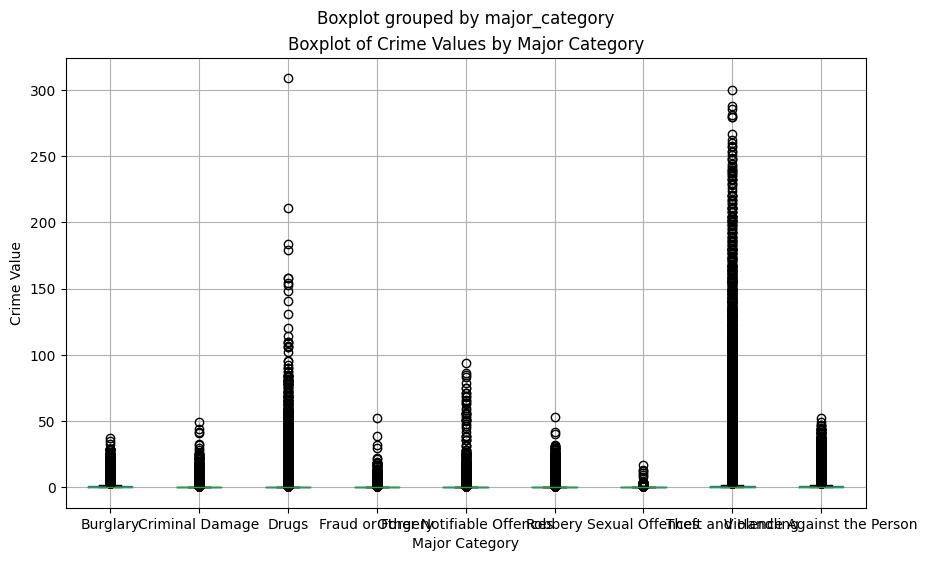

In [ ]:
# Create a box plot of crime values by major category
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='value', by='major_category', ax=ax)
ax.set_xlabel('Major Category')
ax.set_ylabel('Crime Value')
ax.set_title('Boxplot of Crime Values by Major Category')

In [ ]:
# Calculate the IQR and remove outliers
q1 = df['value'].quantile(0.25)
q3 = df['value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

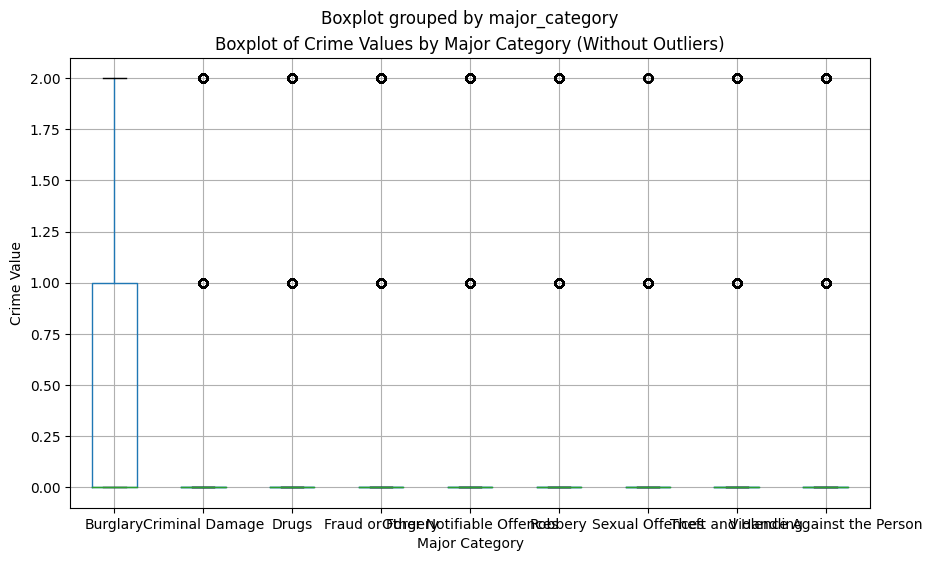

In [ ]:
# Create a box plot of crime values by major category without outliers
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='value', by='major_category', ax=ax)
ax.set_xlabel('Major Category')
ax.set_ylabel('Crime Value')
ax.set_title('Boxplot of Crime Values by Major Category (Without Outliers)')
plt.show()

### AREA PLOT

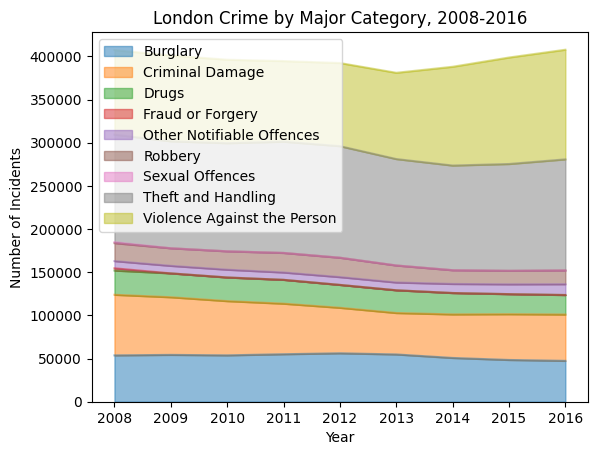

In [ ]:
# Aggregate the data by year and major category
df_agg = df.groupby(['year', 'major_category']).sum()

# Pivot the data to have major categories as columns
df_pivot = df_agg.pivot_table(index='year', columns='major_category', values='value')

# Create the area plot
df_pivot.plot(kind='area', stacked=True, alpha=0.5)

# Set plot properties
plt.title("London Crime by Major Category, 2008-2016")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(loc='upper left')

# Show the plot
plt.show()

Berdasarkan area plot yang telah dihasilkan dapat disimpulkan sebagai berikut:
1. Kejahatan kategori burglary, criminal damage, drugs, fraud or forgery, other notifiable offences, robbery, sexual offences cenderung menurun sejak tahun 2008
2. Kejahatan kategori violence against the person dan theft and handling setelah menurun paling rendah pada tahun 2014 mengalami kenaikan kembali

# HISTOGRAM

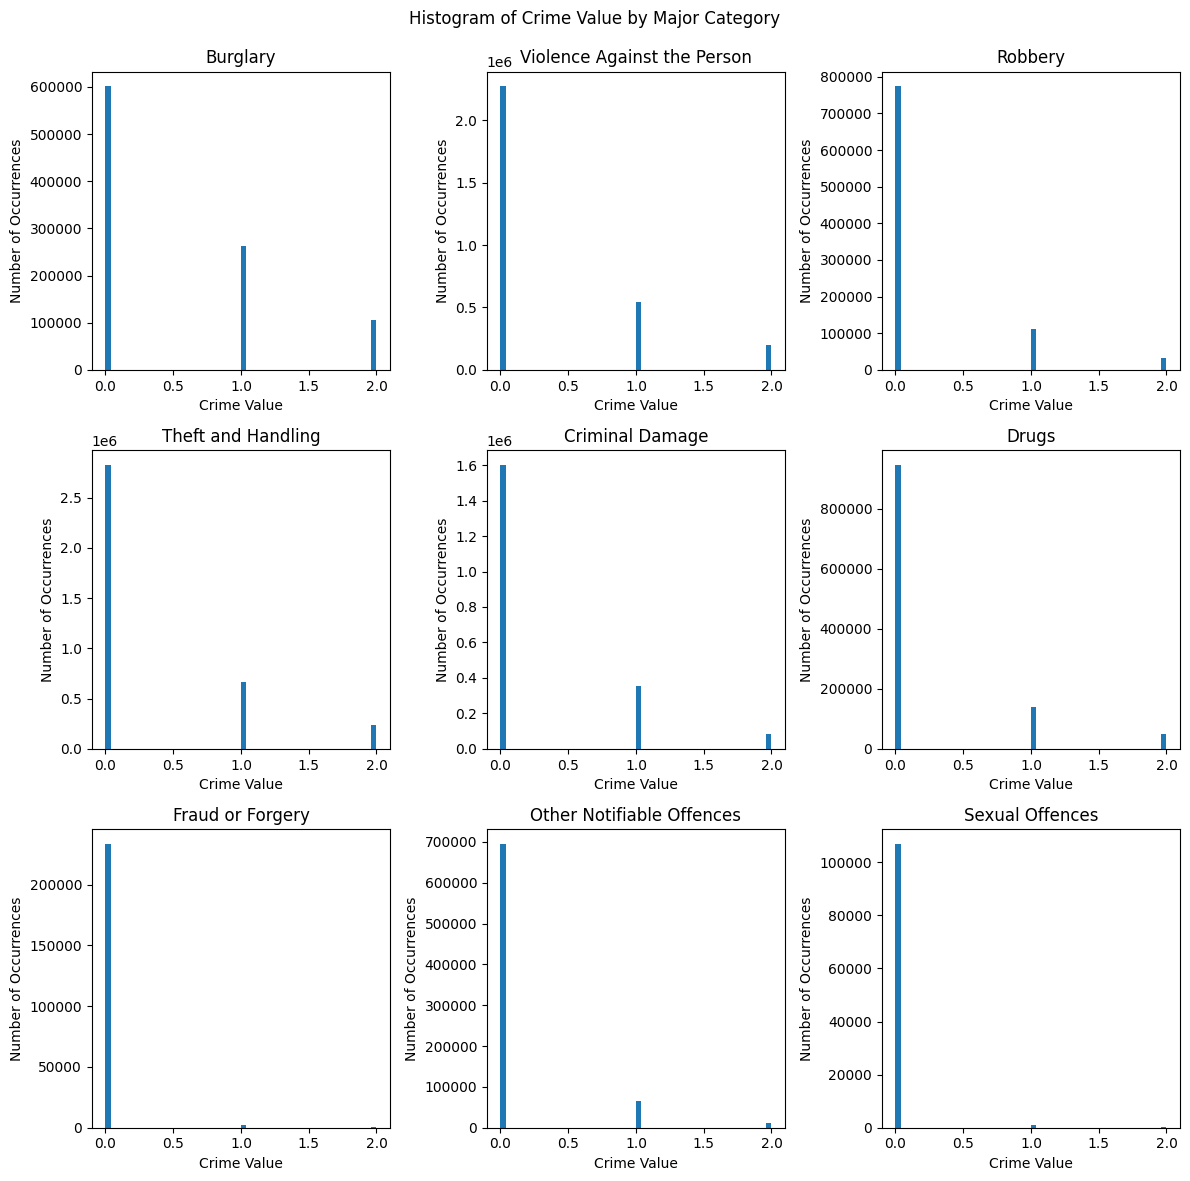

In [ ]:
crime_df = df

# Create a figure with subplots for each major_category
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Loop through the major_categories and create a histogram for each one
for i, category in enumerate(crime_df['major_category'].unique()):
    ax = axes[i//3, i%3]
    ax.hist(crime_df[crime_df['major_category'] == category]['value'], bins=50)
    ax.set_title(category)
    ax.set_xlabel('Crime Value')
    ax.set_ylabel('Number of Occurrences')

# Add a title to the overall figure
plt.suptitle('Histogram of Crime Value by Major Category')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

Secara keseluruhan, histogram menunjukkan bahwa tingkat kejahatan di London menurun dari tahun ke tahun selama periode yang dicakup oleh kumpulan data ini.Namun, dalam beberapa tahun telah terjadi peningkatan jumlah kejahatan dalam kategori tertentu.

# Bar Chart

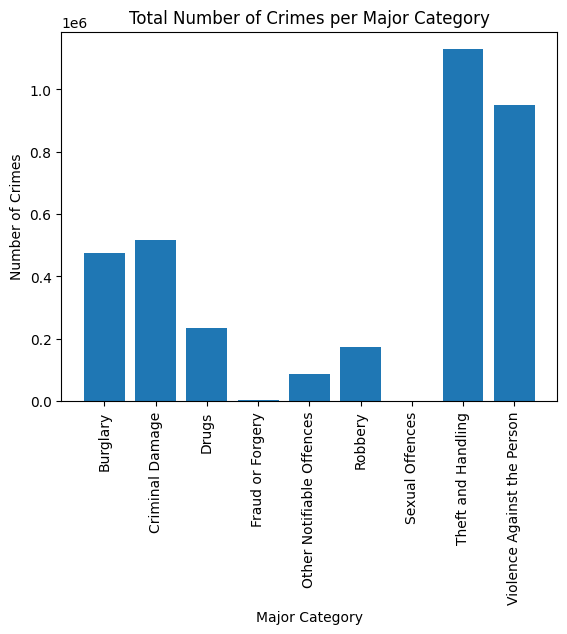

In [ ]:
# Calculate the total number of crimes per major category
total_crimes = df.groupby('major_category')['value'].sum().reset_index()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(total_crimes['major_category'], total_crimes['value'])

# Set the chart title and axis labels
ax.set_title('Total Number of Crimes per Major Category')
ax.set_xlabel('Major Category')
ax.set_ylabel('Number of Crimes')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

Berdasarkan bar chart dapat dilihat bahwa urutan total kategori kejahatan dari yang tertinggi hingga terendah yaitu theft and handling, violence against the person, burglary, criminal damage, drugs, robbery, other notifiable offences, dan yang terakhir fraud or forgery

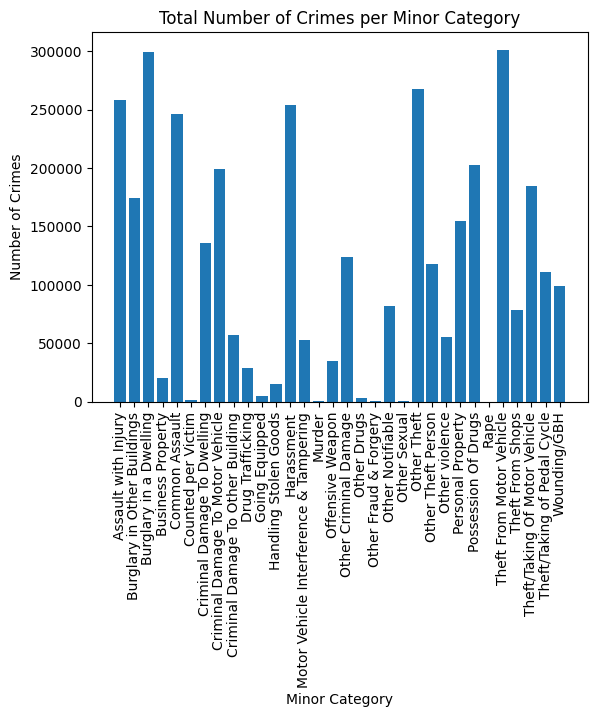

In [ ]:
# Calculate the total number of crimes per major category
total_crimes = df.groupby('minor_category')['value'].sum().reset_index()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(total_crimes['minor_category'], total_crimes['value'])

# Set the chart title and axis labels
ax.set_title('Total Number of Crimes per Minor Category')
ax.set_xlabel('Minor Category')
ax.set_ylabel('Number of Crimes')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

Kejahatan Minor 3 besar tertinggi ditempati oleh other theft, theft from motor vehicle, dan burglary in dwelling

# Pie Chart

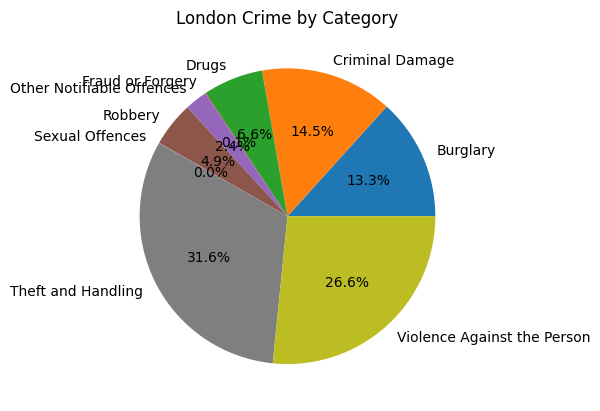

In [ ]:
# Group the data by major_category and sum the values
category_counts = df.groupby('major_category')['value'].sum()

# Create a pie chart of the category counts
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('London Crime by Category')
plt.show()

Pie chart menunjukan Theft handling memiliki porsi terbesar dari total kejahatan major yang ada yaitu sebanyak 31.6% disusul oleh violence against the person 26.6% dan burglary 13.3%

# WordCloud

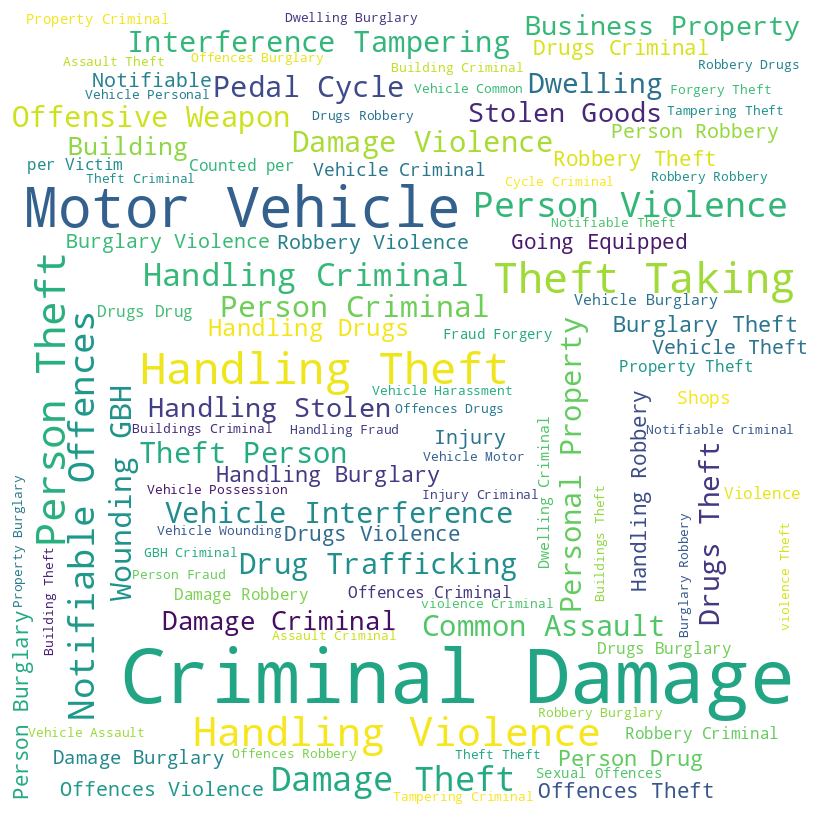

In [ ]:
# Load a sample of the dataset
df_frac = df.sample(frac=0.1)

# Create a WordCloud object with max words to display as 100
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', max_words=100)

# Create a string of all the major_category and minor_category columns
text = " ".join(cat for cat in df_frac['major_category']) + " " + " ".join(cat for cat in df_frac['minor_category'])

# Generate the word cloud
wordcloud.generate(text)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display the plot
plt.show()

Berdasarkan data WordCloud Kejahatan yang paling sering muncuk yaiu Criminal Damage

# Folium Map

In [ ]:
# Load the crime data from CSV file
crime_data = df

# Create a base map centered on London
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Group the data by borough and calculate the total crime count
borough_data = crime_data.groupby('borough').agg({'value': 'sum'}).reset_index()

# Add a choropleth layer to the map showing the total crime count by borough
folium.Choropleth(
    geo_data='london_boroughs.json',  # GeoJSON file containing the boundaries of London boroughs
    name='choropleth',
    data=borough_data,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Crime Count'
).add_to(london_map)

# Add a layer control to the map so that the choropleth can be toggled on/off
folium.LayerControl().add_to(london_map)

# Display the map
london_map

Berdasarkan folium map yang dipadukan dengan heat map dapat dilihat bahwa kejahatan paling sering terjadi di pusat kota dengan angka 79 dan terjadi penurunan pada pinggiran daerah.